In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)
lat_lngs

In [64]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in lat_lngs:
    print(coordinate[0], coordinate[1])


-53.147609097522974 -121.07249286596073
-29.42465890620406 76.3850595882596
-73.05283696161446 171.4322128196722
81.33023578566767 -43.32300635689964
13.576653683385189 16.848884789399165
-74.38328058993308 120.40230933481689
42.95272329146718 -115.4149635218891
-15.146914760918222 -11.63047371976839
51.129573996559714 98.03405143271624
47.94114892428141 -102.39923015405007
56.34776135968454 65.69666288588564
-35.788596648973666 111.42550471415836
-25.09183081681543 -41.05953804299125
-24.081681695729472 -91.15476818568827
31.39496416876969 -24.247300808119775
84.50986660596811 40.57553873065183
87.30656356744927 -39.155341291788744
-36.6775861107093 38.50034478623539
88.54753081598065 95.49183576827193
41.087039314642 146.96975657931813
52.98471275814504 -16.729796527805632
-45.70555263032706 52.86221923030965
48.202914140373366 -150.90487837506365
-24.15556351562566 -138.49615142134598
87.24883596587537 116.59948360773546
-31.335347802966133 45.22410241157769
-9.758475623395867 -43.9

8.084092074007785 164.0580143085225
-36.577641346118746 66.94203831073054
59.35034607646733 -138.09144392625726
-80.48032608969812 -64.68690182902264
54.799433957248596 -158.7898436820899
66.4987958192333 -82.48874567938755
-46.63565941389766 178.24276194955183
-73.43885182172629 -170.11719188206268
30.219532015922624 41.35705417611888
31.944775810576857 60.39312789183094
-33.64235358446898 171.05741104433412
-82.90956966045711 -115.75774662370817
-42.1121714522333 70.64345875963357
54.60063688482393 -38.1016705144126
-43.31019271547903 -35.75035872731337
-40.32564743815042 -132.5247916089966
-85.55174409249506 -137.02597688608932
-48.901363032255176 -108.76127736186992
-26.717524333116494 118.03623967110434
64.92355539859301 -68.0467602651905
83.10578453889369 38.26151408135689
-54.76147454003842 55.94497953271102
1.0932721964700107 13.42631220896476
32.46027065434923 -68.52127043135569
14.389877507129825 -4.181079309609174
-37.79147632208155 158.9904905350731
-44.71581023911485 130.9

In [65]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [66]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

670

In [71]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [87]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38dcbca4e18440eb988aff406f53a3fa


In [88]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "city"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38dcbca4e18440eb988aff406f53a3fa&q=city


In [89]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "city"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 69.89,
  'feels_like': 68.74,
  'temp_min': 68,
  'temp_max': 72,
  'pressure': 1004,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 280},
 'clouds': {'all': 40},
 'dt': 1617948795,
 'sys': {'type': 1,
  'id': 9588,
  'country': 'AU',
  'sunrise': 1617913331,
  'sunset': 1617954460},
 'timezone': 36000,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [90]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [91]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [92]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 14 | filadelfia
Processing Record 2 of Set 14 | pevek
Processing Record 3 of Set 14 | limbang
Processing Record 4 of Set 14 | faya
Processing Record 5 of Set 14 | amderma
City not found. Skipping...
Processing Record 6 of Set 14 | kodiak
Processing Record 7 of Set 14 | ilulissat
Processing Record 8 of Set 14 | mount isa
Processing Record 9 of Set 14 | marquette
Processing Record 10 of Set 14 | marinette
Processing Record 11 of Set 14 | longyearbyen
Processing Record 12 of Set 14 | lai
Processing Record 13 of Set 14 | lebu
Processing Record 14 of Set 14 | nueva loja
Processing Record 15 of Set 14 | busselton
Processing Record 16 of Set 14 | new norfolk
Processing Record 17 of Set 14 | wanning
Processing Record 18 of Set 14 | igrim
Processing Record 19 of Set 14 | ushuaia
Processing Record 20 of Set 14 | albany
Processing Record 21 of Set 14 | arraial do cabo
Processing Record 22 of Set 14 | areka
Processing Record 23 of Set 14 | longview
Processing Record 24 o

City not found. Skipping...
Processing Record 35 of Set 17 | dunedin
Processing Record 36 of Set 17 | leirvik
Processing Record 37 of Set 17 | kaniama
Processing Record 38 of Set 17 | bonavista
Processing Record 39 of Set 17 | yulara
Processing Record 40 of Set 17 | nanortalik
Processing Record 41 of Set 17 | ola
Processing Record 42 of Set 17 | road town
Processing Record 43 of Set 17 | assiniboia
Processing Record 44 of Set 17 | benguela
Processing Record 45 of Set 17 | effingham
Processing Record 46 of Set 17 | cidreira
Processing Record 47 of Set 17 | shakhtinsk
Processing Record 48 of Set 17 | baoqing
Processing Record 49 of Set 17 | kruisfontein
Processing Record 50 of Set 17 | okhotsk
Processing Record 1 of Set 18 | lavrentiya
Processing Record 2 of Set 18 | georgetown
Processing Record 3 of Set 18 | kuroiso
Processing Record 4 of Set 18 | finnsnes
Processing Record 5 of Set 18 | marawi
Processing Record 6 of Set 18 | beyneu
Processing Record 7 of Set 18 | pisco
Processing Recor

Processing Record 21 of Set 21 | ukiah
Processing Record 22 of Set 21 | tulagi
Processing Record 23 of Set 21 | cayenne
Processing Record 24 of Set 21 | astoria
Processing Record 25 of Set 21 | catuday
Processing Record 26 of Set 21 | carauari
Processing Record 27 of Set 21 | coahuayana
Processing Record 28 of Set 21 | dali
Processing Record 29 of Set 21 | fonte boa
Processing Record 30 of Set 21 | kant
Processing Record 31 of Set 21 | karkaralinsk
City not found. Skipping...
Processing Record 32 of Set 21 | kyra
Processing Record 33 of Set 21 | vostok
Processing Record 34 of Set 21 | port lincoln
Processing Record 35 of Set 21 | nieuw amsterdam
Processing Record 36 of Set 21 | samusu
City not found. Skipping...
Processing Record 37 of Set 21 | vung tau
Processing Record 38 of Set 21 | panzhihua
Processing Record 39 of Set 21 | noyabrsk
Processing Record 40 of Set 21 | ngukurr
City not found. Skipping...
Processing Record 41 of Set 21 | tabou
Processing Record 42 of Set 21 | rojhan
Pro

Processing Record 10 of Set 25 | floro
Processing Record 11 of Set 25 | pokrovskoye
Processing Record 12 of Set 25 | rio gallegos
Processing Record 13 of Set 25 | constantine
Processing Record 14 of Set 25 | northam
Processing Record 15 of Set 25 | kawana waters
City not found. Skipping...
Processing Record 16 of Set 25 | cochabamba
Processing Record 17 of Set 25 | diamantino
Processing Record 18 of Set 25 | beidao
Processing Record 19 of Set 25 | ejido
Processing Record 20 of Set 25 | constitucion
Processing Record 21 of Set 25 | noormarkku
Processing Record 22 of Set 25 | kaikalur
Processing Record 23 of Set 25 | sao gotardo
Processing Record 24 of Set 25 | durban
Processing Record 25 of Set 25 | ishigaki
Processing Record 26 of Set 25 | dalby
Processing Record 27 of Set 25 | villarrica
Processing Record 28 of Set 25 | povazska bystrica
Processing Record 29 of Set 25 | mana
Processing Record 30 of Set 25 | scottsbluff
Processing Record 31 of Set 25 | luangwa
Processing Record 32 of S

In [93]:
len(city_data)

619

In [94]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Filadelfia,39.9523,-75.1638,54.00,81,75,4.68,US,2021-04-09 06:17:21
1,Pevek,69.7008,170.3133,-7.26,90,9,1.36,RU,2021-04-09 06:17:22
2,Limbang,4.7500,115.0000,89.60,70,75,9.22,MY,2021-04-09 06:17:23
3,Faya,18.3851,42.4509,73.40,23,0,11.50,SA,2021-04-09 06:17:23
4,Kodiak,57.7900,-152.4072,19.40,42,75,33.38,US,2021-04-09 06:17:23
5,Ilulissat,69.2167,-51.1000,33.80,80,75,11.50,GL,2021-04-09 06:17:24
6,Mount Isa,-20.7333,139.5000,96.80,17,22,5.75,AU,2021-04-09 06:17:24
7,Marquette,46.5333,-87.6335,53.01,96,100,10.40,US,2021-04-09 06:17:24
8,Marinette,45.1000,-87.6307,51.80,100,90,9.22,US,2021-04-09 06:16:26
9,Longyearbyen,78.2186,15.6401,24.80,80,75,4.61,SJ,2021-04-09 06:17:24


In [101]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df= city_data_df[new_column_order]

In [104]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Filadelfia,US,2021-04-09 06:17:21,39.9523,-75.1638,54.00,81,75,4.68
1,Pevek,RU,2021-04-09 06:17:22,69.7008,170.3133,-7.26,90,9,1.36
2,Limbang,MY,2021-04-09 06:17:23,4.7500,115.0000,89.60,70,75,9.22
3,Faya,SA,2021-04-09 06:17:23,18.3851,42.4509,73.40,23,0,11.50
4,Kodiak,US,2021-04-09 06:17:23,57.7900,-152.4072,19.40,42,75,33.38
5,Ilulissat,GL,2021-04-09 06:17:24,69.2167,-51.1000,33.80,80,75,11.50
6,Mount Isa,AU,2021-04-09 06:17:24,-20.7333,139.5000,96.80,17,22,5.75
7,Marquette,US,2021-04-09 06:17:24,46.5333,-87.6335,53.01,96,100,10.40
8,Marinette,US,2021-04-09 06:16:26,45.1000,-87.6307,51.80,100,90,9.22
9,Longyearbyen,SJ,2021-04-09 06:17:24,78.2186,15.6401,24.80,80,75,4.61


In [106]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [107]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

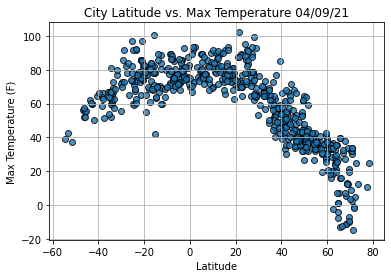

In [108]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

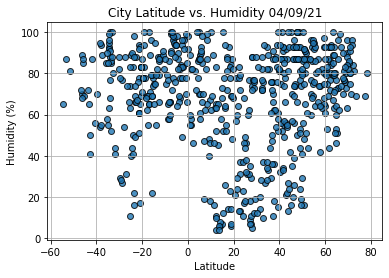

In [109]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

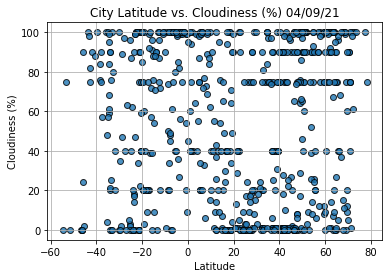

In [110]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

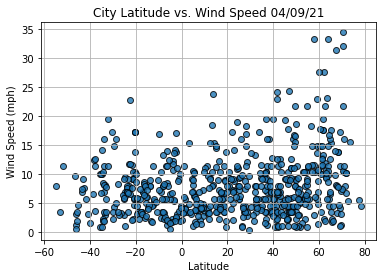

In [111]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()